In [1]:
!pip install rdkit
!pip install pubchempy
!pip install git+https://github.com/samoturk/mol2vec

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/samoturk/mol2vec to c:\users\juand\appdata\local\temp\pip-req-build-ovdmf5sy


  ERROR: Error [WinError 2] O sistema não pode encontrar o arquivo especificado while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [48]:
from rdkit import Chem
from rdkit.Chem import AllChem
#import skchem
import pubchempy as pcp
import pandas as pd
import numpy as np
import scipy as sp

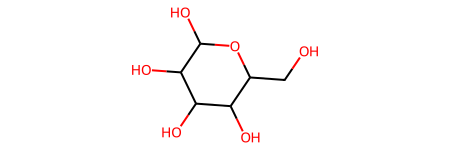

'Glucose'

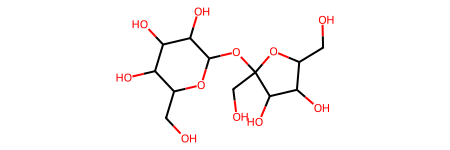

'Sucrose'

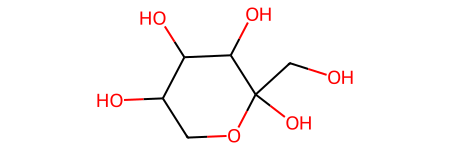

'Fructose'

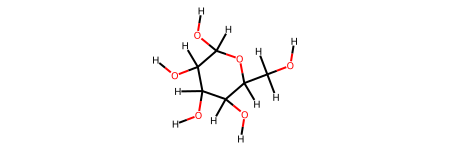

'Glucose'

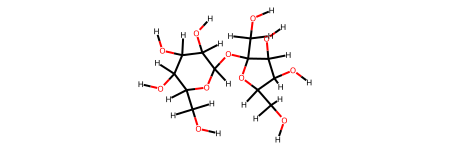

'Sucrose'

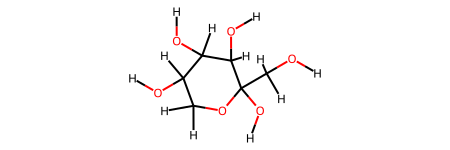

'Fructose'

[None, None, None]

In [51]:
# Procurando componente por nome
m1 = 'Glucose'
m2 = 'Sucrose'
m3 = 'Fructose'
ms = [m1,m2,m3]

c1 = pcp.get_compounds(m1,'name')[0]
c2 = pcp.get_compounds(m2,'name')[0]
c3 = pcp.get_compounds(m3,'name')[0]

cs = [c1,c2,c3]

[display(Chem.MolFromSmiles(c.canonical_smiles),ms[i]) for i,c in enumerate(cs)]

c1_mol = Chem.MolFromSmiles(c1.canonical_smiles)
c2_mol = Chem.MolFromSmiles(c2.canonical_smiles)
c3_mol = Chem.MolFromSmiles(c3.canonical_smiles)

mols = [c1_mol,c2_mol,c3_mol]

[display(AllChem.AddHs(c),ms[i]) for i,c in enumerate(mols)]

In [59]:
# PROPRIEDADES #
from scipy.spatial import distance

# Molecular Fingerprint By PubChem #
fp1 = [int(val1) for val1 in c1.cactvs_fingerprint]
fp2 = [int(val2) for val2 in c2.cactvs_fingerprint]
fp3 = [int(val3) for val3 in c3.cactvs_fingerprint]

# Difference Between Compounds #
# Compute the Cosine distance between 1-D arrays #
d1d2 = distance.cosine(fp1,fp2)
d1d3 = distance.cosine(fp1,fp3)
d2d3 = distance.cosine(fp2,fp3)

# Compute the correlation distance between two 1-D arrays #
d1d2_c = 1 - distance.cosine(fp1,fp2)
d1d3_c = 1 - distance.cosine(fp1,fp3)
d2d3_c = 1 - distance.cosine(fp2,fp3)

print(d1d2,d1d3,d2d3)
print(d1d2_c,d1d3_c,d2d3_c)

0.07417990022744858 0.024099927051466796 0.09649209709474871
0.9258200997725514 0.9759000729485332 0.9035079029052513


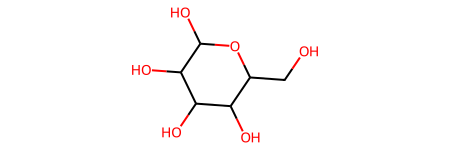

In [35]:
c1_mol

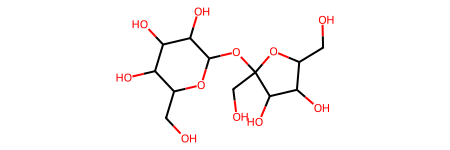

In [36]:
c2_mol

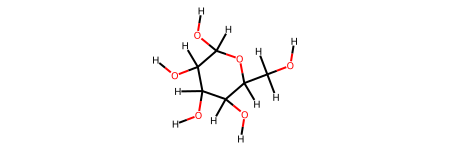

In [37]:
AllChem.AddHs(c1_mol)

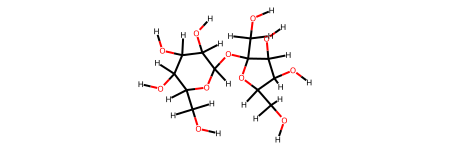

In [38]:
AllChem.AddHs(c2_mol)

In [40]:
in_c1 = Chem.MolToInchi(c1_mol)
in_c2 = Chem.MolToInchi(c2_mol)

[09:30:54] WARNING: Omitted undefined stereo

[09:30:54] WARNING: Omitted undefined stereo



In [42]:
in_c1

'InChI=1S/C6H12O6/c7-1-2-3(8)4(9)5(10)6(11)12-2/h2-11H,1H2'

In [63]:
in_c2

'InChI=1S/C12H22O11/c13-1-4-6(16)8(18)9(19)11(21-4)23-12(3-15)10(20)7(17)5(2-14)22-12/h4-11,13-20H,1-3H2'

In [3]:
# DB TO TRAIN #

# MOL2VEC
# DB FROM SCIKIT-CHEM 
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk
 